#Deep Learning Pipeline
- Data
- Model
- Loss
- Training Process

#Tensor

In [1]:
# To use PyTorch
import torch

In [2]:
# How to create tensor
tensor = torch.tensor(data=[[1, 2, 3], [4, 5, 6]], dtype=torch.float, device='cpu', requires_grad=False)

print(f'Tensor from List\n{tensor}')

Tensor from List
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [3]:
# How to create special tensor 1
tensor_ones = torch.ones_like(input=tensor)
tensor_rand = torch.rand_like(input=tensor)

print(f'Ones Tensor\n{tensor_ones}\n')
print(f'Random Tensor\n{tensor_rand}')

Ones Tensor
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Random Tensor
tensor([[0.9733, 0.0089, 0.4204],
        [0.3320, 0.4993, 0.5204]])


In [4]:
# How to create special tensor 2
shape = (2, 3,)

ones_tensor = torch.ones(shape)
rand_tensor = torch.rand(shape)
zeros_tensor = torch.zeros(shape)

print(f'Ones Tensor\n{ones_tensor}\n')
print(f'Random Tensor\n{rand_tensor}\n')
print(f'Zeros Tensor\n{zeros_tensor}')

Ones Tensor
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Random Tensor
tensor([[0.7402, 0.3713, 0.8102],
        [0.0284, 0.9279, 0.6968]])

Zeros Tensor
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [5]:
# Tensor's Attribute
tensor = torch.rand(3, 4)

print(f'Shape of tensor: {tensor.shape}')
print(f'Dtype of tensor: {tensor.dtype}')
print(f'Device of tensor: {tensor.device}')

Shape of tensor: torch.Size([3, 4])
Dtype of tensor: torch.float32
Device of tensor: cpu


In [6]:
# How to combine tensors
tensor = torch.zeros((3, 2))

tensor_cat0 = torch.cat([tensor, tensor, tensor], dim=0)
tensor_cat1 = torch.cat([tensor, tensor], dim=1)

tensor_stack = torch.stack([tensor, tensor, tensor, tensor])

print(f'concat dim=0: {tensor_cat0.shape}')
print(f'concat dim=1: {tensor_cat1.shape}')
print(f'stack: {tensor_stack.shape}')

concat dim=0: torch.Size([9, 2])
concat dim=1: torch.Size([3, 4])
stack: torch.Size([4, 3, 2])


#Data

In [7]:
# How to use built-in dataset
from torchvision import datasets, transforms

# Dataset
# training dataset
train_dataset = datasets.FashionMNIST(
    root='data',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

# evaluation dataset
val_dataset = datasets.FashionMNIST(
    root='data',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [8]:
# How to create dataloader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True
)

val_dataloader = DataLoader(
    dataset=val_dataset,
    batch_size=64,
    shuffle=False
)

for inputs, labels in train_dataloader:
    print(f'Inputs : {inputs.shape}')
    print(f'Labels : {labels.shape}')
    break

Inputs : torch.Size([64, 1, 28, 28])
Labels : torch.Size([64])


Label: 0


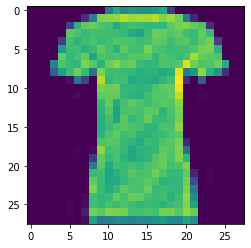

In [9]:
import random
import matplotlib.pyplot as plt

def Tensor2Image(tensor):
    image = tensor.numpy()
    plt.imshow(image.reshape(28, 28))

n = random.randint(0, 1000)

input, label = train_dataset[n]

print(f'Label: {label}')
Tensor2Image(input)

#Model

In [10]:
# To create neural network
import torch.nn as nn

In [11]:
flatten = nn.Flatten()

tensor = torch.ones(64, 1, 28, 28)
print(f'Before: {tensor.shape}')

tensor = flatten(tensor)
print(f'After: {tensor.shape}')

Before: torch.Size([64, 1, 28, 28])
After: torch.Size([64, 784])


In [12]:
linear = nn.Linear(784, 512)

print(f'Before: {tensor.shape}')

tensor = linear(tensor)
print(f'After: {tensor.shape}')

Before: torch.Size([64, 784])
After: torch.Size([64, 512])


In [13]:
relu = nn.ReLU()

tensor = torch.tensor([[0.8908, -0.1784], [-0.3282, 0.4263]])
print(f'Before\n{tensor}')

tensor = relu(tensor)
print(f'After\n{tensor}')

Before
tensor([[ 0.8908, -0.1784],
        [-0.3282,  0.4263]])
After
tensor([[0.8908, 0.0000],
        [0.0000, 0.4263]])


In [14]:
# How to create single network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, inputs):
        return self.network(inputs)

test_input = torch.ones(64, 1, 28, 28)
test_network = NeuralNetwork()
test_output = test_network(test_input)

print(f'Input: {test_input.shape}')
print(f'Output: {test_output.shape}')

Input: torch.Size([64, 1, 28, 28])
Output: torch.Size([64, 10])


In [15]:
# How to use network as a block
class NeuralBlock(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()

        self.block = nn.Sequential(
            nn.Linear(in_features, out_features),
            nn.ReLU()
        )
    
    def forward(self, inputs):
        return self.block(inputs)

class NeuralNetworkV2(nn.Module):
    def __init__(self):
        super().__init__()

        self.network = nn.Sequential(
            nn.Flatten(),
            NeuralBlock(28 * 28, 512),
            NeuralBlock(512, 512),
            NeuralBlock(512, 512),
            nn.Linear(512, 10)
        )

    def forward(self, inputs):
        return self.network(inputs)

test_input = torch.ones(64, 1, 28, 28)
test_network = NeuralNetworkV2()
test_output = test_network(test_input)

print(f'Input: {test_input.shape}')
print(f'Output: {test_output.shape}')

Input: torch.Size([64, 1, 28, 28])
Output: torch.Size([64, 10])


In [16]:
print(test_network)

NeuralNetworkV2(
  (network): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): NeuralBlock(
      (block): Sequential(
        (0): Linear(in_features=784, out_features=512, bias=True)
        (1): ReLU()
      )
    )
    (2): NeuralBlock(
      (block): Sequential(
        (0): Linear(in_features=512, out_features=512, bias=True)
        (1): ReLU()
      )
    )
    (3): NeuralBlock(
      (block): Sequential(
        (0): Linear(in_features=512, out_features=512, bias=True)
        (1): ReLU()
      )
    )
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


#Loss

In [17]:
# Loss comparison
criterion = nn.CrossEntropyLoss()

test_outputs0 = torch.tensor([[1, 2 ,3], [2, 3, 1]], dtype=torch.float)
test_outputs1 = torch.tensor([[3, 2, 1], [1, 2, 3]], dtype=torch.float)
test_labels = torch.tensor([0, 2])

loss0 = criterion(test_outputs0, test_labels)
loss1 = criterion(test_outputs1, test_labels)

print(f'Loss 0: {loss0}')
print(f'Loss 1: {loss1}')

Loss 0: 2.4076058864593506
Loss 1: 0.40760594606399536


#Training Process

In [18]:
import torch.optim as optim
from tqdm import tqdm

In [19]:
def train_one_epoch(model, dataloader, criterion, optimizer, device):
    model.train()

    train_loss = 0.0
    for inputs, labels in tqdm(dataloader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and gradient descent
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
    
    print(f'Train Loss: {train_loss}')

In [20]:
def eval_one_epoch(model, dataloader, criterion, device):
    model.eval()

    eval_loss = 0.0
    for inputs, labels in tqdm(dataloader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward
        with torch.no_grad():
            outputs = model(inputs)
            loss = criterion(outputs, labels)

        eval_loss += loss.item()
    
    print(f'Eval Loss: {eval_loss}')

In [21]:
def train(epochs):
    net = NeuralNetwork()

    optimizer = optim.SGD(params=net.parameters(), lr=1e-3)

    # Use Accelerator
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    print(f'Device : {device}')

    net = net.to(device)

    for epoch in range(epochs):
        print(f'Epoch : {epoch + 1} ==============================')
        train_one_epoch(
            model=net,
            dataloader=train_dataloader,
            criterion=criterion,
            optimizer=optimizer,
            device=device
        )
        eval_one_epoch(
            model=net,
            dataloader=val_dataloader,
            criterion=criterion,
            device=device
        )
    torch.save(net.state_dict(), 'network.pth')

train(5)

Device : cuda
Epoch : 1 ==============================


100%|██████████| 938/938 [00:09<00:00, 95.64it/s] 


Train Loss: 2149.9401791095734


100%|██████████| 157/157 [00:01<00:00, 156.18it/s]


Eval Loss: 357.87826108932495
Epoch : 2 ==============================


100%|██████████| 938/938 [00:07<00:00, 130.95it/s]


Train Loss: 2121.630551338196


100%|██████████| 157/157 [00:01<00:00, 155.07it/s]


Eval Loss: 351.8601415157318
Epoch : 3 ==============================


100%|██████████| 938/938 [00:07<00:00, 117.56it/s]


Train Loss: 2070.233978509903


100%|██████████| 157/157 [00:00<00:00, 158.66it/s]


Eval Loss: 339.91298747062683
Epoch : 4 ==============================


100%|██████████| 938/938 [00:07<00:00, 129.37it/s]


Train Loss: 1962.936820268631


100%|██████████| 157/157 [00:00<00:00, 158.68it/s]


Eval Loss: 314.2657912969589
Epoch : 5 ==============================


100%|██████████| 938/938 [00:07<00:00, 130.15it/s]


Train Loss: 1737.6358536481857


100%|██████████| 157/157 [00:00<00:00, 157.60it/s]

Eval Loss: 264.2259968519211


#Test

In [22]:
# How to compute proba
softmax = nn.Softmax(dim=1)

test_output = torch.tensor([
    [1, 2, 3],
    [2, 4, 6],
], dtype=torch.float)

print(softmax(test_output))

tensor([[0.0900, 0.2447, 0.6652],
        [0.0159, 0.1173, 0.8668]])


label : 4


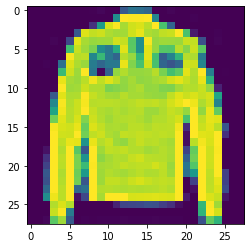

In [23]:
# Random sample
n = random.randint(0, len(val_dataset) - 1)

test_input, test_label = val_dataset[n]

print(f'label : {test_label}')
Tensor2Image(test_input)

In [24]:
# Untrained Network
net = NeuralNetwork()

test_output = net(test_input)
test_prob = softmax(test_output)
test_predict = test_prob.argmax()

print(test_output)
print(test_prob)
print(test_predict)

tensor([[-0.0461, -0.0565,  0.0102,  0.0221, -0.0225,  0.0177,  0.0872,  0.0267,
          0.0036,  0.0243]], grad_fn=<AddmmBackward0>)
tensor([[0.0948, 0.0938, 0.1003, 0.1015, 0.0971, 0.1010, 0.1083, 0.1019, 0.0996,
         0.1017]], grad_fn=<SoftmaxBackward0>)
tensor(6)


In [42]:
# Trained Network
net.load_state_dict(torch.load('network.pth'))

test_output = net(test_input)
test_prob = softmax(test_output)
test_predict = test_prob.argmax()

print(test_output)
print(test_prob)
print(test_predict)

tensor([[-12.3883,  -3.5414,  -3.4416,  15.3589, -12.4819,   1.6270, -21.6098,
          -9.5772,  -5.0468,  -6.2512]], grad_fn=<AddmmBackward0>)
tensor([[8.9030e-13, 6.1901e-09, 6.8400e-09, 1.0000e+00, 8.1076e-13, 1.0873e-06,
         8.8043e-17, 1.4805e-11, 1.3737e-09, 4.1195e-10]],
       grad_fn=<SoftmaxBackward0>)
tensor(3)
